# `Predicting NHL Game Outcomes: A Comparative Study of Machine Learning Models and Betting Strategies`

Nathan Anderson <br>
Application Development & Delivery, Red River College Polytech, Winnipeg, R38 1K9, Canada <br>
Email: nanderson4@rrc.ca

__Abstract:__

__Index Terms:__

__1. Introduction__

__2. Related Work__

_Notebook Setup_

In [1]:
# Import python coding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Random
import random
random.seed(42)
np.random.seed(42)
#tf.random.set_seed(42)

# Import file containing helper functions - utils.py
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\nanderson4\\OneDrive - Red River College Polytech\\Documents\\GitHub\\Repos\\NHL-Game-Prediction-ML-Study\\utils.py'>

In [2]:
# Notebook display options
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth = desired_width)
pd.set_option('display.max_columns', 300)

__3. Data Preparation and Preprocessing__

_3.1 Data Collection_

In [3]:
# Importing historical NHL game data
URL = 'https://moneypuck.com/moneypuck/playerData/careers/gameByGame/all_teams.csv'
rawData = utils.api_call(URL)
rawData.head()

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,0.0000,0.0000,0.0000,42.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.689,0.019,0.069,0.164,0.020,0.521,0.207,0.019,0.019,0.019,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.019,0.000,0.000,0.0,0.0,0.0,1.00,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,0.4596,0.6408,0.6310,3600.0,37.733,2.287,2.842,8.155,1.134,22.530,16.054,2.249,2.396,2.357,41.0,12.0,13.0,66.0,2.0,1.0,0.0,14.0,2.0,18.0,16.0,39.0,51.0,4.0,8.0,30.0,16.0,19.0,8.0,44.0,8.0,1.0,1.040,0.811,0.435,1.0,0.0,1.0,68.292,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,22.880,2.689,1.780,4.436,0.639,12.626,8.830,2.524,2.607,2.450,21.0,10.0,6.0,37.0,1.0,1.0,0.0,5.0,1.0,8.0,15.0,20.0,30.0,7.0,14.0,32.0,17.0,11.0,7.0,16.0,12.0,3.0,0.599,1.278,0.811,1.0,0.0,0.0,36.14,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,0.4857,0.6429,0.6364,2283.0,24.802,1.693,1.724,5.513,0.739,14.650,10.681,1.656,1.803,1.764,28.0,7.0,10.0,45.0,1.0,0.0,0.0,10.0,1.0,14.0,9.0,27.0,34.0,3.0,6.0,19.0,13.0,13.0,7.0,27.0,8.0,0.0,0.882,0.811,0.000,1.0,0.0,0.0,47.292,35.0,36.697,4.0,0.355,0.000,0.000,2.048,2.180,2.130,14.729,1.793,1.117,3.001,0.406,7.737,5.946,1.633,1.711,1.559,11.0,9.0,5.0,25.0,1.0,1.0,0.0,4.0,1.0,4.0,9.0,10.0,19.0,7.0,14.0,18.0,13.0,9.0,5.0,12.0,6.0,2.0,0.498,0.689,0.606,1.0,0.0,0.0,24.14,20.0,19.369

_3.2 Feature Engineering_

In [4]:
# Fix team acronym issues - duplicates and team relocations
cleanData = utils.team_acronyms(rawData)
cleanData.head()

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,TBL,AWAY,20081004,Team Level,other,0.0000,0.0000,0.0000,42.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.689,0.019,0.069,0.164,0.020,0.521,0.207,0.019,0.019,0.019,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.019,0.000,0.000,0.0,0.0,0.0,1.00,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,TBL,AWAY,20081004,Team Level,all,0.4596,0.6408,0.6310,3600.0,37.733,2.287,2.842,8.155,1.134,22.530,16.054,2.249,2.396,2.357,41.0,12.0,13.0,66.0,2.0,1.0,0.0,14.0,2.0,18.0,16.0,39.0,51.0,4.0,8.0,30.0,16.0,19.0,8.0,44.0,8.0,1.0,1.040,0.811,0.435,1.0,0.0,1.0,68.292,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,22.880,2.689,1.780,4.436,0.639,12.626,8.830,2.524,2.607,2.450,21.0,10.0,6.0,37.0,1.0,1.0,0.0,5.0,1.0,8.0,15.0,20.0,30.0,7.0,14.0,32.0,17.0,11.0,7.0,16.0,12.0,3.0,0.599,1.278,0.811,1.0,0.0,0.0,36.14,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,TBL,AWAY,20081004,Team Level,5on5,0.4857,0.6429,0.6364,2283.0,24.802,1.693,1.724,5.513,0.739,14.650,10.681,1.656,1.803,1.764,28.0,7.0,10.0,45.0,1.0,0.0,0.0,10.0,1.0,14.0,9.0,27.0,34.0,3.0,6.0,19.0,13.0,13.0,7.0,27.0,8.0,0.0,0.882,0.811,0.000,1.0,0.0,0.0,47.292,35.0,36.697,4.0,0.355,0.000,0.000,2.048,2.180,2.130,14.729,1.793,1.117,3.001,0.406,7.737,5.946,1.633,1.711,1.559,11.0,9.0,5.0,25.0,1.0,1.0,0.0,4.0,1.0,4.0,9.0,10.0,19.0,7.0,14.0,18.0,13.0,9.0,5.0,12.0,6.0,2.0,0.498,0.689,0.606,1.0,0.0,0.0,24.14,20.0,19.369

In [5]:
# Basic Feature Engineering using the cleanData and the function above
engData = utils.basic_feat_eng(cleanData)
engData = engData.sort_values('gameId')
engData.head()

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,SavePercentage,home_or_away,TieScore,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
2,NYR,2008,NYR,2008020001,NYR,TBL,0,0,0,0,0.909091,AWAY,1,2008-10-04,Team Level,5on5,0.4857,0.6429,0.6364,2283.0,24.802,1.693,1.724,5.513,0.739,14.650,10.681,1.656,1.803,1.764,28.0,7.0,10.0,45.0,1.0,0.0,0.0,10.0,1.0,14.0,9.0,27.0,34.0,3.0,6.0,19.0,13.0,13.0,7.0,27.0,8.0,0.0,0.882,0.811,0.000,1.0,0.0,0.0,47.292,35.0,36.697,4.0,0.355,0.000,0.000,2.048,2.180,2.130,14.729,1.793,1.117,3.001,0.406,7.737,5.946,1.633,1.711,1.559,11.0,9.0,5.0,25.0,1.0,1.0,0.0,4.0,1.0,4.0,9.0,10.0,19.0,7.0,14.0,18.0,13.0,9.0,5.0,12.0,6.0,2.0,0.498,0.689,0.606,1.0,0.0,0.0,24.14,20.0,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0
3,NYR,2008,NYR,2008020001,NYR,TBL,0,0,0,0,1.000000,AWAY,1,2008-10-04,Team Level,4on5,0.0482,0.0909,0.1000,468.0,0.640,0.034,0.022,0.096,0.021,0.236,0.590,0.034,0.034,0.034,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,3.0,5.0,0.0,1.0,0.0,0.0,0.034,0.000,0.000,0.0,0.0,0.0,1.000,1.0,1.000,0.0,0.007,0.000,0.000,0.041,0.041,0.041,6.597,0.671,0.511,1.194,0.194,4.143,2.287,0.666,0.671,0.666,8.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,8.0,9.0,0.0,0.0,2.0,3.0,0.0,1.0,3.0,6.0,0.0,0.082,0.590,0.000,0.0,0.0,0.0,10.00,9.0,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0
1,NYR,2008,NYR,2008020001,NYR,TBL,0,0,1,0,0.952381,AWAY,0,2008-10-04,Team Level,all,0.4596,0.6408,0.6310,3600.0,37.733,2.287,2.842,8.155,1.134,22.530,16.054,2.249,2.396,2.357,41.0,12.0,13.0,66.0,2.0,1.0,0.0,14.0,2.0,18.0,16.0,39.0,51.0,4.0,8.0,30.0,16.0,19.0,8.0,44.0,8.0,1.0,1.040,0.811,0.435,1.0,0.0,1.0,68.292,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,22.880,2.689,1.780,4.436,0.639,12.626,8.830,2.524,2.607,2.450,21.0,10.0,6.0,37.0,1.0,1.0,

_3.3 Slicing the Data_

In [6]:
# Slice data based on certain conditions
slicedData = engData[(engData['situation'] == 'all') &
        (engData['season'] >= 2023) &
        (engData['Shootout Game'] == 0) &
        (engData['OT Game'] == 0) 
        ].copy()

print("Shape:", slicedData.shape)

# Sorting the DataFrame by a specific column (replace 'column_name' with your desired column)
slicedData = slicedData.sort_values(by='gameId', ascending=False)

# Display the first 5 rows of the sorted DataFrame
slicedData.tail()

Shape: (2452, 117)


,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,SavePercentage,home_or_away,TieScore,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
73696,VGK,2023,VGK,2023020003,VGK,SEA,0,0,1,0,0.969697,HOME,0,2023-10-10,Team Level,all,0.5364,0.4621,0.4667,3600.0,30.401,3.988,2.237,7.085,0.993,16.247,11.451,3.876,4.018,3.907,28.0,14.0,19.0,61.0,4.0,4.0,0.0,4.0,0.0,15.0,15.0,24.0,38.0,4.0,11.0,29.0,29.0,16.0,13.0,23.0,15.0,4.0,0.784,1.842,1.362,1.0,2.0,1.0,64.120,42.0,43.453,4.0,0.503,1.132,1.132,3.358,3.391,3.346,35.500,3.447,2.613,8.998,1.161,19.509,12.272,3.212,3.455,3.215,33.0,15.0,23.0,71.0,1.0,6.0,0.0,6.0,0.0,21.0,14.0,32.0,47.0,4.0,8.0,20.0,21.0,6.0,4.0,36.0,7.0,5.0,1.022,0.800,1.625,0.0,1.0,0.0,68.674,48.0,47.075,0.0,0.588,1.352,1.352,2.683,2.670,2.563,0
151971,CHI,2023,CHI,2023020002,CHI,PIT,0,0,1,0,0.951220,AWAY,0,2023-10-10,Team Level,all,0.5387,0.5069,0.4954,3600.0,40.566,3.933,3.051,9.745,1.347,21.150,14.775,3.729,3.956,3.751,36.0,18.0,19.0,73.0,4.0,8.0,1.0,7.0,1.0,18.0,16.0,32.0,50.0,1.0,2.0,19.0,13.0,12.0,2.0,44.0,5.0,5.0,1.216,0.605,2.113,1.0,1.0,2.0,72.451,54.0,53.094,2.0,0.688,1.359,1.359,3.262,3.287,3.225,40.648,3.368,2.714,9.775,1.264,22.131,15.748,3.290,3.338,3.260,41.0,14.0,16.0,71.0,2.0,4.0,0.0,7.0,1.0,18.0,23.0,39.0,53.0,4.0,8.0,40.0,23.0,11.0,8.0,43.0,8.0,4.0,1.260,0.949,1.160,1.0,1.0,0.0,71.408,55.0,55.772,3.0,0.603,0.605,0.605,3.366,3.343,3.267,0
14056,PIT,2023,PIT,2023020002,PIT,CHI,0,0,0,1,0.888889,HOME,0,2023-10-10,Team Level,all,0.4613,0.4931,0.5046,3600.0,40.648,3.368,2.714,9.775,1.264,22.131,15.748,3.290,3.338,3.260,41.0,14.0,16.0,71.0,2.0,4.0,0.0,7.0,1.0,18.0,23.0,39.0,53.0,4.0,8.0,40.0,23.0,11.0,8.0,43.0,8.0,4.0,1.260,0.949,1.160,1.0,1.0,0.0,71.408,55.0,55.772,3.0,0.603,0.605,0.605,3.366,3.343,3.267,40.566,3.933,3.051,9.745,1.347,21

### Data Visualization

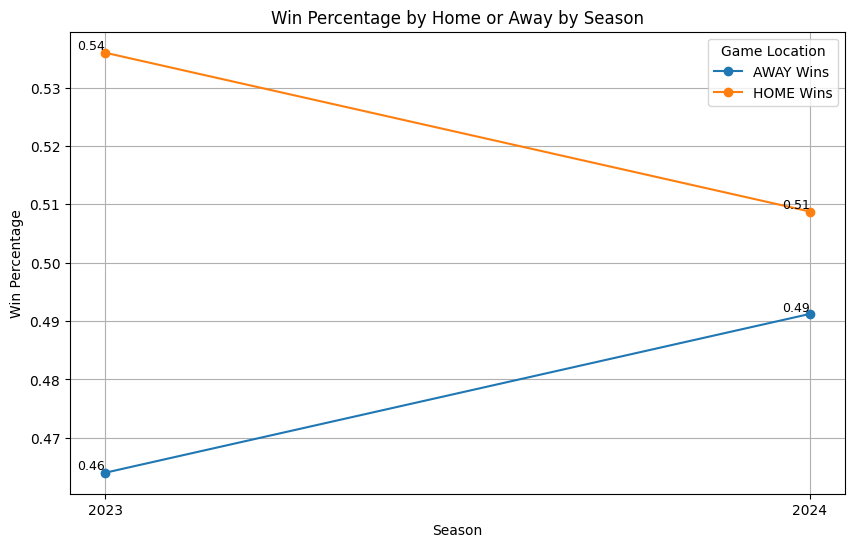

In [7]:
# Home vs Away Win Percentages by Season
# Grouping the data by 'season' and 'home_or_away' to calculate win percentages
win_percentage = slicedData.groupby(['season', 'home_or_away']).Win.mean().reset_index()

# Renaming 'Win' column to 'Win_Percentage' for clarity
win_percentage.rename(columns={'Win': 'Win_Percentage'}, inplace=True)

# Plotting the win percentage by home or away and season
plt.figure(figsize=(10, 6))
for location in win_percentage['home_or_away'].unique():
    df_slice = win_percentage[win_percentage['home_or_away'] == location]
    plt.plot(df_slice['season'], df_slice['Win_Percentage'], marker='o', label=f"{location} Wins")

    # Adding data tags for each point
    for i in range(len(df_slice)):
        plt.text(df_slice['season'].iloc[i], df_slice['Win_Percentage'].iloc[i],
                 f'{df_slice["Win_Percentage"].iloc[i]:.2f}', 
                 fontsize=9, ha='right', va='bottom')

# Setting the x-axis to show only integer season years
plt.xticks(ticks=win_percentage['season'].unique(), labels=win_percentage['season'].unique().astype(int))

# Setting the plot title and labels
plt.title('Win Percentage by Home or Away by Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(title='Game Location')
plt.grid(True)

# Display the plot
plt.show()

In [8]:
# Assuming df is your DataFrame, call the function to calculate and print metrics
df_metrics = utils.calculate_metrics(slicedData)


Total Playoff Games:
144

Total Regular Season Games:
2308

Games by Season:
{2023: 2224, 2024: 228}

Games by Home/Away:
{'AWAY': 1226, 'HOME': 1226}

Games by Team:
{'ANA': 77, 'BOS': 73, 'BUF': 79, 'CAR': 81, 'CBJ': 71, 'CGY': 77, 'CHI': 79, 'COL': 85, 'DAL': 84, 'DET': 67, 'EDM': 95, 'FLA': 95, 'LAK': 75, 'MIN': 71, 'MTL': 64, 'NJD': 82, 'NSH': 80, 'NYI': 64, 'NYR': 84, 'OTT': 73, 'PHI': 70, 'PIT': 72, 'SEA': 69, 'SJS': 75, 'STL': 71, 'TBL': 78, 'TOR': 73, 'UTA': 74, 'VAN': 82, 'VGK': 78, 'WPG': 81, 'WSH': 73}

Total Wins by Team:
{'ANA': 23, 'BOS': 43, 'BUF': 37, 'CAR': 54, 'CBJ': 25, 'CGY': 35, 'CHI': 20, 'COL': 51, 'DAL': 54, 'DET': 31, 'EDM': 54, 'FLA': 62, 'LAK': 42, 'MIN': 37, 'MTL': 24, 'NJD': 39, 'NSH': 42, 'NYI': 30, 'NYR': 55, 'OTT': 28, 'PHI': 31, 'PIT': 34, 'SEA': 30, 'SJS': 14, 'STL': 34, 'TBL': 43, 'TOR': 40, 'UTA': 29, 'VAN': 53, 'VGK': 44, 'WPG': 52, 'WSH': 36}

Games by Home/Away and Season:
{(2023, 'AWAY'): 1112, (2023, 'HOME'): 1112, (2024, 'AWAY'): 114, (2024, 

## Creating TeamMetricsSet

In [9]:
# Dropping columns that will no longer be required
columns_to_drop = ['name', 'gameId', 'playerTeam', 'Shootout Game', 'OT Game', 'Loss', 'TieScore', 'position', 'situation', 'playoffGame']

# Drop the specified columns
droppedData = slicedData.drop(columns=columns_to_drop)
droppedData.head()

,team,season,opposingTeam,Win,SavePercentage,home_or_away,gameDate,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
74151,VGK,2024,CGY,1,1.000000,HOME,2024-10-28,0.7111,0.5391,0.5789,3600.0,31.971,2.841,2.136,7.871,1.063,17.388,12.701,2.751,2.899,2.806,38.0,6.0,25.0,69.0,5.0,1.0,0.0,8.0,1.0,12.0,17.0,33.0,39.0,1.0,2.0,37.0,10.0,15.0,15.0,32.0,11.0,1.0,1.129,1.473,0.238,3.0,2.0,0.0,73.242,44.0,45.630,8.0,0.454,0.238,0.238,3.056,3.112,3.045,22.600,1.154,1.318,5.313,0.737,13.513,9.966,1.132,1.163,1.140,16.0,16.0,27.0,59.0,0.0,0.0,0.0,3.0,0.0,19.0,10.0,16.0,32.0,2.0,4.0,27.0,23.0,11.0,18.0,26.0,5.0,1.0,0.431,0.509,0.214,0.0,0.0,0.0,56.074,32.0,31.151,7.0,0.277,0.000,0.000,1.430,1.439,1.413
166136,CGY,2024,VGK,0,0.868421,AWAY,2024-10-28,0.2889,0.4609,0.4211,3600.0,22.600,1.154,1.318,5.313,0.737,13.513,9.966,1.132,1.163,1.140,16.0,16.0,27.0,59.0,0.0,0.0,0.0,3.0,0.0,19.0,10.0,16.0,32.0,2.0,4.0,27.0,23.0,11.0,18.0,26.0,5.0,1.0,0.431,0.509,0.214,0.0,0.0,0.0,56.074,32.0,31.151,7.0,0.277,0.000,0.000,1.430,1.439,1.413,31.971,2.841,2.136,7.871,1.063,17.388,12.701,2.751,2.899,2.806,38.0,6.0,25.0,69.0,5.0,1.0,0.0,8.0,1.0,12.0,17.0,33.0,39.0,1.0,2.0,37.0,10.0,15.0,15.0,32.0,11.0,1.0,1.129,1.473,0.238,3.0,2.0,0.0,73.242,44.0,45.630,8.0,0.454,0.238,0.238,3.056,3.112,3.045
64286,COL,2024,CHI,0,0.807692,HOME,2024-10-28,0.4241,0.5185,0.4930,3600.0,24.879,2.509,1.920,6.188,0.886,14.541,8.956,2.370,2.422,2.283,26.0,9.0,21.0,56.0,2.0,1.0,0.0,6.0,0.0,13.0,13.0,24.0,33.0,3.0,6.0,32.0,19.0,8.0,17.0,22.0,12.0,1.0,0.745,1.541,0.224,1.0,1.0,0.0,52.875,35.0,33.325,8.0,0.447,0.179,0.179,2.777,2.675,2.573,25.809,3.407,1.805,5.668,0.834,14.105,10.181,3.386,3.606,3.582,26.0,10.0,16.0,52.0,5.0,0.0,0.0,7.0,0.0,10.0,14.0,21.0,31.0,4.0,8.0,24.0,15.0,7.0,11.0,25.0,6.0,5.0,0.761,0.843,1.803,1.0,0.0,4.0,55.919,36.0,38.458,5.0,0.404,0.000,0.000,3.812,4.037,4.009
15

In [10]:
from sklearn.impute import SimpleImputer

# Advanced Feature Engineers
# Sort by team and game date to ensure the rolling calculation is in chronological order
adv_feature_df = droppedData.sort_values(['team', 'gameDate'])

"""
# Calculate the rolling sums and means for the last 10 games, excluding the current game
adv_feature_df['Last_10_Wins'] = adv_feature_df.groupby('team')['Win'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_Goals_For'] = adv_feature_df.groupby('team')['goalsFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_Goals_Against'] = adv_feature_df.groupby('team')['goalsAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_Save_Percentage'] = adv_feature_df.groupby('team')['SavePercentage'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).mean())
adv_feature_df['Last_10_xGoalsPercentage'] = adv_feature_df.groupby('team')['xGoalsPercentage'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).mean())
adv_feature_df['Last_10_CorsiPercentage'] = adv_feature_df.groupby('team')['corsiPercentage'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).mean())
adv_feature_df['Last_10_FenwickPercentage'] = adv_feature_df.groupby('team')['fenwickPercentage'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).mean())
adv_feature_df['Last_10_ShotsOnGoalFor'] = adv_feature_df.groupby('team')['shotsOnGoalFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_ShotsOnGoalAgainst'] = adv_feature_df.groupby('team')['shotsOnGoalAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_HighDangerShotsFor'] = adv_feature_df.groupby('team')['highDangerShotsFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_HighDangerShotsAgainst'] = adv_feature_df.groupby('team')['highDangerShotsAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_PenaltiesFor'] = adv_feature_df.groupby('team')['penaltiesFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_PenaltiesAgainst'] = adv_feature_df.groupby('team')['penaltiesAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_xGoalsFor'] = adv_feature_df.groupby('team')['xGoalsFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_xGoalsAgainst'] = adv_feature_df.groupby('team')['xGoalsAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_HighDangerGoalsFor'] = adv_feature_df.groupby('team')['highDangerGoalsFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_HighDangerGoalsAgainst'] = adv_feature_df.groupby('team')['highDangerGoalsAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_HitsFor'] = adv_feature_df.groupby('team')['hitsFor'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())
adv_feature_df['Last_10_HitsAgainst'] = adv_feature_df.groupby('team')['hitsAgainst'].transform(lambda x: x.shift().rolling(window=10, min_periods=1).sum())

# Calculate long-term (last 41 games) rolling metrics, excluding the current game
adv_feature_df['Last_41_Wins'] = adv_feature_df.groupby('team')['Win'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_Goals_For'] = adv_feature_df.groupby('team')['goalsFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_Goals_Against'] = adv_feature_df.groupby('team')['goalsAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_Save_Percentage'] = adv_feature_df.groupby('team')['SavePercentage'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).mean())
adv_feature_df['Last_41_xGoalsPercentage'] = adv_feature_df.groupby('team')['xGoalsPercentage'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).mean())
adv_feature_df['Last_41_CorsiPercentage'] = adv_feature_df.groupby('team')['corsiPercentage'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).mean())
adv_feature_df['Last_41_FenwickPercentage'] = adv_feature_df.groupby('team')['fenwickPercentage'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).mean())
adv_feature_df['Last_41_ShotsOnGoalFor'] = adv_feature_df.groupby('team')['shotsOnGoalFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_ShotsOnGoalAgainst'] = adv_feature_df.groupby('team')['shotsOnGoalAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_HighDangerShotsFor'] = adv_feature_df.groupby('team')['highDangerShotsFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_HighDangerShotsAgainst'] = adv_feature_df.groupby('team')['highDangerShotsAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_PenaltiesFor'] = adv_feature_df.groupby('team')['penaltiesFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_PenaltiesAgainst'] = adv_feature_df.groupby('team')['penaltiesAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_xGoalsFor'] = adv_feature_df.groupby('team')['xGoalsFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_xGoalsAgainst'] = adv_feature_df.groupby('team')['xGoalsAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_HighDangerGoalsFor'] = adv_feature_df.groupby('team')['highDangerGoalsFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_HighDangerGoalsAgainst'] = adv_feature_df.groupby('team')['highDangerGoalsAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_HitsFor'] = adv_feature_df.groupby('team')['hitsFor'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())
adv_feature_df['Last_41_HitsAgainst'] = adv_feature_df.groupby('team')['hitsAgainst'].transform(lambda x: x.shift().rolling(window=41, min_periods=1).sum())

# Handle missing values using SimpleImputer (fill missing values with 0)
imputer = SimpleImputer(strategy='constant', fill_value=0)
adv_feature_df_imputed = pd.DataFrame(imputer.fit_transform(adv_feature_df), columns=adv_feature_df.columns)
"""

# Add the time decay column
decay_factor = 0.9  # Define the decay factor (e.g., 0.9 for 10% decay per game)
adv_feature_df['Game_Index'] = adv_feature_df.groupby('team').cumcount()
adv_feature_df['Time_Decay'] = decay_factor ** adv_feature_df['Game_Index']

# Drop columns not needed for training
columns_to_drop = ['gameDate', 'Game_Index', 'goalsFor', 'goalsAgainst', 'SavePercentage',
                   'lowDangerGoalsFor', 'mediumDangerGoalsFor', 'highDangerGoalsFor',
                   'lowDangerGoalsAgainst', 'mediumDangerGoalsAgainst', 'highDangerGoalsAgainst',
                   'savedShotsOnGoalFor', 'savedShotsOnGoalAgainst','reboundGoalsAgainst', 'reboundGoalsFor',
                   'savedUnblockedShotAttemptsAgainst', 'savedUnblockedShotAttemptsFor', 'scoreAdjustedShotsAttemptsAgainst', 
                   'scoreAdjustedShotsAttemptsFor', 'scoreAdjustedTotalShotCreditAgainst', 'scoreAdjustedTotalShotCreditFor', 
                   'scoreAdjustedUnblockedShotAttemptsAgainst', 'scoreAdjustedUnblockedShotAttemptsFor', 
                   'scoreFlurryAdjustedTotalShotCreditAgainst', 'scoreFlurryAdjustedTotalShotCreditFor',]

adv_feature_df = adv_feature_df.drop(columns=columns_to_drop)

# Columns to be one-hot encoded
categorical_cols = ['team', 'opposingTeam', 'season', 'home_or_away'] 

# One-hot encode categorical columns
TeamMetricsSet = pd.get_dummies(adv_feature_df, columns=categorical_cols, dtype=int)

# Display shape and sample rows
print(TeamMetricsSet.shape)
TeamMetricsSet.head()


(2452, 148)


,Win,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,reboundsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,unblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,reboundsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,unblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,Time_Decay,team_ANA,team_BOS,team_BUF,team_CAR,team_CBJ,team_CGY,team_CHI,team_COL,team_DAL,team_DET,team_EDM,team_FLA,team_LAK,team_MIN,team_MTL,team_NJD,team_NSH,team_NYI,team_NYR,team_OTT,team_PHI,team_PIT,team_SEA,team_SJS,team_STL,team_TBL,team_TOR,team_UTA,team_VAN,team_VGK,team_WPG,team_WSH,opposingTeam_ANA,opposingTeam_BOS,opposingTeam_BUF,opposingTeam_CAR,opposingTeam_CBJ,opposingTeam_CGY,opposingTeam_CHI,opposingTeam_COL,opposingTeam_DAL,opposingTeam_DET,opposingTeam_EDM,opposingTeam_FLA,opposingTeam_LAK,opposingTeam_MIN,opposingTeam_MTL,opposingTeam_NJD,opposingTeam_NSH,opposingTeam_NYI,opposingTeam_NYR,opposingTeam_OTT,opposingTeam_PHI,opposingTeam_PIT,opposingTeam_SEA,opposingTeam_SJS,opposingTeam_STL,opposingTeam_TBL,opposingTeam_TOR,opposingTeam_UTA,opposingTeam_VAN,opposingTeam_VGK,opposingTeam_WPG,opposingTeam_WSH,season_2023,season_2024,home_or_away_AWAY,home_or_away_HOME
70556,0,0.3983,0.4153,0.4118,3600.0,25.953,2.884,1.677,6.149,0.850,13.490,9.951,2.705,2.897,2.718,23.0,12.0,14.0,49.0,1.0,6.0,0.0,11.0,16.0,8.0,22.0,27.0,29.0,8.0,5.0,25.0,7.0,3.0,0.807,0.796,1.281,35.0,3.0,0.382,0.559,0.559,2.707,36.336,4.356,2.632,8.171,1.183,20.041,13.617,4.229,4.331,4.206,38.0,12.0,19.0,69.0,4.0,9.0,0.0,11.0,22.0,7.0,17.0,29.0,22.0,11.0,5.0,35.0,8.0,7.0,1.156,0.806,2.394,50.0,1.0,0.583,0.976,0.976,3.963,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
70561,1,0.5733,0.3577,0.3958,3600.0,27.778,4.653,1.695,6.901,0.936,13.679,10.136,4.323,4.670,4.337,25.0,13.0,11.0,49.0,5.0,5.0,0.0,9.0,13.0,8.0,18.0,28.0,16.0,5.0,2.0,23.0,8.0,7.0,0.707,0.969,2.978,38.0,1.0,0.370,1.178,1.178,3.845,40.548,3.463,2.432,9.887,1.359,23.923,16.936,3.418,3.439,3.394,35.0,23.0,30.0,88.0,0.0,4.0,0.0,31.0,20.0,5.0,10.0,28.0,13.0,4.0,5.0,50.0,4.0,4.0,1.351,0.397,1.715,58.0,2.0,0.548,0.000,0.000,4.011,0.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
70566,0,0.3772,0.5315,0.4937,3600.0,29.089,2.431,1.889,6.992,1.057,15.317,11.313,2.334,2.374,2.277,29.0,10.0,20.0,59.0,2.0,7.0,0.0,17.0,11.0,4.0,8.0,19.0,27.0,4.0,13.0,28.0,9.0,2.0,0.851,1.036,0.545,39.0,4.0,0.416,0.277,0.277,2.570,29.148,4.014,1.932,7.069,0.982,14.450,11.553,3.834,4.082,3.900,24.0,16.0,12.0,52.0,5.0,6.0,0.0,13.0,13.0,4.0,8

_3.4 Creating Training Datasets_

_TeamMetricsSet_

In [11]:
# Separate features and labels from TeamMetricsSet
features = TeamMetricsSet.drop(columns='Win')  # Replace 'target' with the actual target column name
labels = TeamMetricsSet['Win']  # Replace 'target' with the actual target column name

# Apply the split_data function
TeamMetricsSet_X_train, TeamMetricsSet_X_test, TeamMetricsSet_y_train, TeamMetricsSet_y_test = utils.split_data(features, labels, test_size=0.2, random_state=10)


In [12]:
# Initialize StandardScaler and PCA with 95% variance retention
scaler = StandardScaler()

# Standardize the training set
TeamMetricsSet_X_train_standardized = scaler.fit_transform(TeamMetricsSet_X_train)

# Transform the test set using the same scaler
TeamMetricsSet_X_test_standardized = scaler.transform(TeamMetricsSet_X_test)

# Optional: Verify the shape of transformed sets
print("Training set shape after standardization:", TeamMetricsSet_X_train_standardized.shape)
print("Test set shape after standardization:", TeamMetricsSet_X_test_standardized.shape)

Training set shape after standardization: (1961, 147)
Test set shape after standardization: (491, 147)


_CombinedMetricsSet_

_MetricDifferencesSet_

_3.5 Creating Prediction Dataset_

__4. Model Development__

_4.1 Feature Importance Analysis_



_4.2 Model Training and Tuning_

_Model Training_

In [13]:
# TeamMetricsSet

# Ensure labels have a continuous index
TeamMetricsSet_y_train = TeamMetricsSet_y_train.reset_index(drop=True)
TeamMetricsSet_y_train = TeamMetricsSet_y_train.astype(int)

# To evaluate with PCA
result_pca = utils.evaluate_logistic_regression(TeamMetricsSet_X_train, TeamMetricsSet_y_train, n_splits=5, apply_pca=True)
print("With PCA:", result_pca)

# To evaluate without PCA
result_no_pca = utils.evaluate_logistic_regression(TeamMetricsSet_X_train, TeamMetricsSet_y_train, n_splits=5, apply_pca=False)
print("Without PCA:", result_no_pca)

With PCA: {'accuracy': np.float64(0.8567144415017914), 'log_loss': np.float64(0.34328883384464365), 'auc': np.float64(0.9309752757417066)}
Without PCA: {'accuracy': np.float64(0.9719517578023575), 'log_loss': np.float64(0.08197784258808936), 'auc': np.float64(0.9969727609266021)}


_Model Tuning_

_4.3 Model Evaluation_

_4.4 Model Predictions_

__5. Betting Strategies and Evaluation__

_5.1 Betting Strategies_

_The Kelly Criterion_

_Small Equal Bets_

_Threshold-Based_

_5.2 Betting Strategy_

_The Kelly Criterion Strategy_

_Small Equal Bets Strategy_

_Threshold-Based Strategy_

_5.3 Betting Strategy Evaluation_

__6. Conclusion and Future Work__

__References__